In [2]:
import pandas as pd
def format_city(a): #this func to emphasize the countries
    a["name"]
    return a["name"]
countries = ["England","Wales"]

In [3]:
teams = pd.read_json('teams.json')
teams["country"] = teams["area"].apply(format_city) #to extract the countries from the first columns which is a dict
teams = teams.loc[teams["country"].isin(countries)].reset_index(drop = True)
teams = teams.loc[teams["type"] != "national"] #drop wales and england because it is national club
teams

,area,city,name,officialName,type,wyId,country
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613,England
1,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673,England
2,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531,Wales
3,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659,England
4,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651,England
5,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646,England
6,"{'name': 'England', 'id': '0', 'alpha3code': '...",Leicester,Leicester City,Leicester City FC,club,1631,England
7,"{'name': 'England', 'id': '0', 'alpha3code': '...",London,West Ham United,West Ham United FC,club,1633,England
8,"{'name': 'England', 'id': '0', 'alpha3code': '...",Stoke-on-Trent,Stoke City,Stoke City FC,club,1639,England
9,"{'name': 'England', 'id': '0', 'alpha3code': '...",Watford,Watford,Watford FC,club,1644,England


In [4]:
coaches = pd.read_json("coaches.json")

In [5]:
team_id = set(teams["wyId"].unique())
coaches_id = set(coaches["currentTeamId"].unique())

In [6]:
matches = pd.read_json("matches_England.json")



def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # [Away.strip()],Score_home.strip(),Score_away.strip()
    return Home.strip()
matches["First_team"] = matches["label"].apply(format_score_team)
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Away.strip()
matches["Second_team"] = matches["label"].apply(format_score_team)
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Score_home.strip()
matches["Score_first"] = matches["label"].apply(format_score_team)
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Score_away.strip()
matches["Score_second"] = matches["label"].apply(format_score_team)

# the script to match the number of team and the name of team

name_number = dict(zip(list(teams["name"]),list(teams["wyId"])))
commands_numbers_1 = []
commands_numbers_2 = []
for i in matches.index:
    commands_numbers_1.append(name_number[matches["First_team"][i]])
    commands_numbers_2.append(name_number[matches["Second_team"][i]])
matches["First_command_id"] = commands_numbers_1
matches["Second_command_id"] = commands_numbers_2

def extractTeamsData(data,First_command_id,Second_command_id,i):
    a = pd.io.json.json_normalize((matches['teamsData'])[i][str(matches[str(First_command_id)][i])])
    b = pd.io.json.json_normalize((matches['teamsData'])[i][str(matches[str(Second_command_id)][i])])
    pref_1,pref_2 = a["side"][0],b["side"][0] #to understand for which command i have opened the dictrionary
    col_1,col_2 = list(a.columns),list(b.columns) 
    a.columns = list(map(lambda x: x + "_" + pref_1,col_1)) #add the prefix for columns to understand data belongs
    b.columns = list(map(lambda x: x + "_" + pref_2,col_2)) #add the prefix for columns to understand data belongs
    res = pd.merge( a,b,on = a.index,how='outer') #merge the 2 datas because it is for one match
    return res

data = pd.DataFrame()
for i in matches.index:
    data = data.append(extractTeamsData(matches,str("First_command_id"),str("Second_command_id"),i)) #create DataFrame of the teamData columns
data.reset_index(drop = True,inplace=True)
drop_col = ["key_0"]
data.drop(drop_col, inplace=True, axis=1)

matches_data = pd.merge(matches,data,on = matches.index,how='outer') #merge matches and data
drop_col = ["key_0"]
matches_data.drop(drop_col, inplace=True, axis=1)

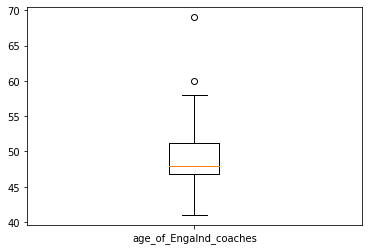

In [8]:
from datetime import date
import matplotlib.pyplot as plt
matches_data1 = matches_data[['coachId_home','teamId_home']]
matches_data1.rename(columns={'coachId_home':'coachId','teamId_home':'teamId'},inplace = True)
matches_data2 = matches_data[['coachId_away','teamId_away']]
matches_data2.rename(columns={'coachId_away':'coachId','teamId_away':'teamId'},inplace = True)
result = pd.concat([matches_data1,matches_data2])  
result2= result[result['coachId'].map(int) != 0]
result3 = result2.drop_duplicates()
result3 = result3.reset_index(drop = True) # I take all coachId and TeamId and i remove duplicates
team = teams['area']
team = pd.io.json.json_normalize(team)
team2 = teams[['city','name','officialName','type','wyId']]
team3 = pd.concat([team,team2],axis=1) 
team3 = team3.rename(columns={"wyId":"teamId"}) 
result4 = pd.merge(result3,team3,on = "teamId") #I merge my dataframe with all teams
team2 = coaches.rename(columns={"wyId":"coachId"})
result5 = pd.merge(result4,team2,on = "coachId") #I merge my dataframe with all coaches
result6 = result5.groupby(['officialName'])['birthDate'].max().reset_index().rename(columns={'officialName':'OfficialName','birthDate' : 'BirthDateCoach'})
# I take only the youngest coach for each teams
today = date.today().isoformat()
year_today,month_today,day_today = map(int,today.split("-"))
list_date = []
for x in result6["BirthDateCoach"]:
    year,month,day = map(int,x.split("-"))
    if month > month_today:
        age = year_today - year - 1
    elif month == month_today and day > day_today:
        age = year_today - year - 1
    else:
        age = year_today - year
    list_date.append(age) # I calcolate age of the coaches
data = pd.DataFrame({'AgeCoach':list_date})
result7 = pd.concat([result6, data], axis=1)
result7  = result7.sort_values(by = 'BirthDateCoach',ascending = False) # I order the coaches by birthdate
result7  = result7.reset_index(drop = True)
result8 = result7.head(10)
plt.boxplot(list_date,labels=['age_of_Engalnd_coaches']) # I show the distribuition of the age with  the box plot
plt.show()

In [11]:
result8


,OfficialName,BirthDateCoach,AgeCoach
0,AFC Bournemouth,1977-11-29,41
1,Watford FC,1977-07-12,42
2,Leicester City FC,1975-12-04,43
3,Everton FC,1973-10-16,46
4,Newcastle United FC,1973-02-19,46
5,Tottenham Hotspur FC,1972-03-02,47
6,Swansea City AFC,1972-01-08,47
7,Huddersfield Town FC,1971-10-19,47
8,Southampton FC,1971-10-05,48
9,Burnley FC,1971-06-28,48
